# Week 9 In-Class Activity

This week we will explore the concept of convolution and how it relates to filtering in the time domain. Let's revisit the Arctic sea ice extent data from our GCM pre-industrial control integration from the [courseware](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/filtering_in_time.html).

In [387]:
# Load packages
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle as pickle
mpl.rc('font',size=14,weight='bold') #set default font size and weight for plots

# Part I: Filter Arctic SIE

First, let's read in the Arctic SIE data and filter in time using a running-mean filter and a Gaussian filter.

In [388]:
# Read in Arctic SIE data
fname = 'SIE_Total.pickle'
with open(fname,'rb') as fp:
    sie,lat,lon = pickle.load(fp, encoding = 'iso8859')

In [389]:
# Convert sie to time series 
sie_ts = np.ravel(sie)

Filter using running-mean filter:

In [390]:
# Here is a nice python package that does the same thing as the code above
L = 365
sie_rm = np.convolve(sie_ts,np.ones((L,))/L,mode='valid')

Plot original and filtered time series. Just plot the first 50 years of each time series.

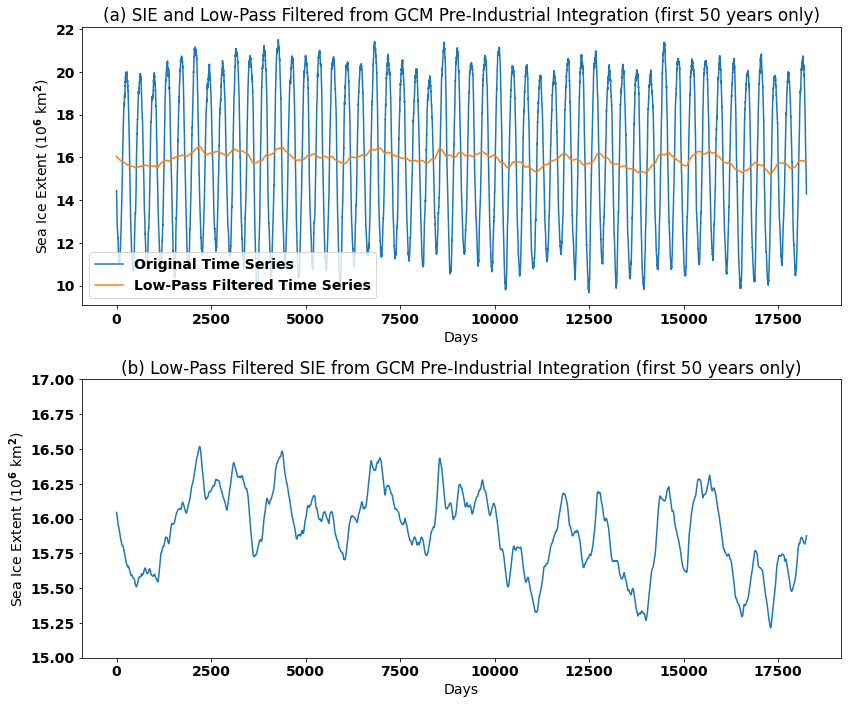

In [391]:
# Plot raw and running-mean filtered time series
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(sie_ts[182:50*365+182]/1e12, label = "Original Time Series") # note that the start index is 182 to match the running-mean filter
plt.plot(np.asarray(sie_rm[0:50*365])/1e12, label="Low-Pass Filtered Time Series") 
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('(a) SIE and Low-Pass Filtered from GCM Pre-Industrial Integration (first 50 years only)')
plt.legend()
plt.tight_layout()

# Plot just the running-mean filtered time series
plt.subplot(2,1,2)
plt.plot(np.asarray(sie_rm[0:50*365])/1e12)
plt.ylim(15,17)
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('(b) Low-Pass Filtered SIE from GCM Pre-Industrial Integration (first 50 years only)')
plt.tight_layout()

Create Gaussian filter to filter out the seasonal cycle. Recall that the standard deviation should correspond to about half the length of the seasonal cycle.

In [416]:
# create Gaussian filter
sigma = 183

# define x variable for st.norm.pdf function
window = 6*sigma
x = np.linspace(-int(window / 2), int(window / 2), int(window))

gaus = st.norm.pdf(x,0,sigma)

Filter using Gaussian filter:

In [417]:
# low-pass filter Arctic SIE using Gaussian filter
sie_gaus = np.convolve(sie_ts,gaus,'valid')

Plot original and filtered time series. Just plot the first 50 years of each time series.

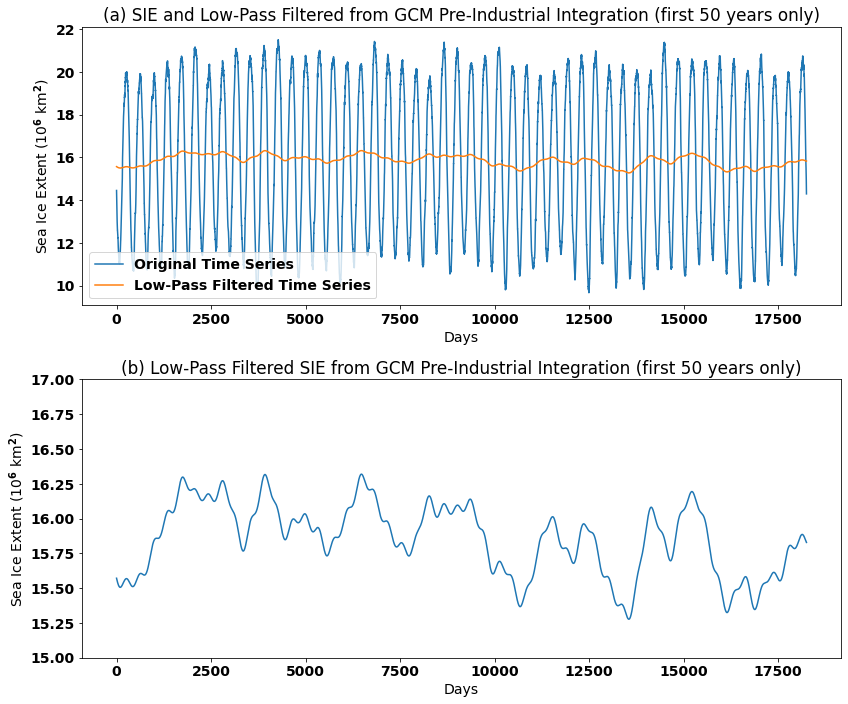

In [418]:
# Plot raw and running-mean filtered time series
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(sie_ts[182:50*365+182]/1e12, label = "Original Time Series") # note that the start index is 182 to match the running-mean filter
plt.plot(np.asarray(sie_gaus[0:50*365])/1e12, label="Low-Pass Filtered Time Series") 
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('(a) SIE and Low-Pass Filtered from GCM Pre-Industrial Integration (first 50 years only)')
plt.legend()
plt.tight_layout()

# Plot just the running-mean filtered time series
plt.subplot(2,1,2)
plt.plot(np.asarray(sie_gaus[0:50*365])/1e12)
plt.ylim(15,17)
plt.xlabel('Days')
plt.ylabel('Sea Ice Extent (10$^6$ km$^2$)')
plt.title('(b) Low-Pass Filtered SIE from GCM Pre-Industrial Integration (first 50 years only)')
plt.tight_layout()

**Reflection Question:**\
Compare the plots of the running-mean and Gaussian filtered time series. Do they look similar/different? How are they similar/different (qualitatively)?

# Part II: Response Functions

Now, let's test how well our filters are working. The Fourier Transforms of our filtered time series should show that the low frequencies are retained but the high frequencies have been removed. We can approach this by considering the convolution theorem i.e., that the Fourier Transform of the convolution of a filter with a time series is equal to the product of the two individual Fourier Transforms.

To start, we will compute and plot the *response functions* for the filters. Recall the *ideal* low-pass filter response function from the courseware. All other low-pass filter response functions should be compared to this. 

As we have seen in the courseware, there is an analytical solution for the Fourier Transform of the running-mean filter. Likewise, there is an analytical solution for the Fourier Transform of the Gaussian filter:

$$
H(f) = e^{-2\pi^2\sigma^2f^2}
$$

where $f$ is the frequency and $\sigma$ is the standard deviation of the Gaussian distribution.

Let's compute these response functions and plot them. Below, I am converting frequency to **cycles per year** rather than cycles per day to ease interpretation.

In [419]:
# Response functions

# time variable
t = np.arange(0,len(sie_ts),1)

# frequency (in cycles per year)
freq = 365*np.arange(0,int(len(t)/2)+1)/(len(t))

# ideal response function
ideal_response = np.zeros(len(freq)) # zeros for the high frequencies
ideal_response[0:401]= np.ones(len(freq[0:401])) # ones for the low frequencies up to 1 year

# running-mean response function
bxcr_response= np.sinc(freq*L/365) # this formula looks a bit different from the courseware because we are not using the radial frequency

# Gaussian response function
gaus_response = np.exp(-(2*np.pi**2)*((freq)**2)*((sigma/365)**2))

Plot the response functions as a function of frequency, `freq`:

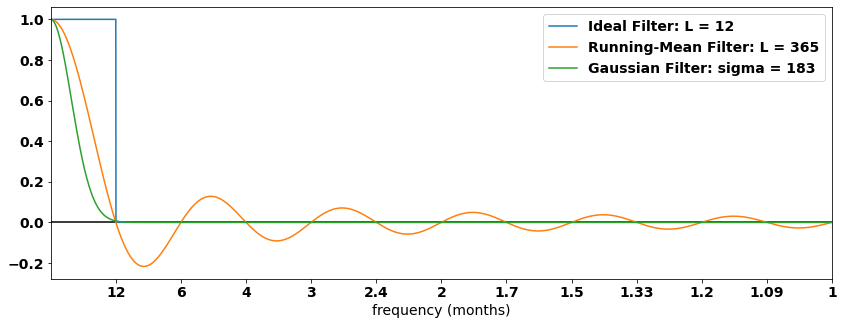

In [420]:
# plot response functions
plt.figure(figsize=(14,5))
plt.axhline(0,color='k')
plt.plot(freq,ideal_response,label = 'Ideal Filter: L = 12')
plt.plot(freq,bxcr_response,label = 'Running-Mean Filter: L = 365')
plt.plot(freq,gaus_response,label = 'Gaussian Filter: sigma = 183')
plt.xlim(0,freq[400])
plt.xticks([freq[400],freq[800],freq[1200],freq[1600],freq[2000],freq[2400],freq[2800],
            freq[3200],freq[3600],freq[4000],freq[4400],freq[4800]],
           ["12","6","4","3","2.4","2","1.7","1.5","1.33","1.2","1.09","1"])
plt.xlabel('frequency (months)')
plt.legend()

**Reflection Question:**\
What do the different response functions show? For each one, what frequencies will be filtered out and which will not?

**Sensitivity Test:**\
What happens to the above plot if you change $\sigma$? Try $\sigma$ = 365 and $\sigma$ = 90. 

# Part III: Fourier Transforms of Filtered Time Series

Now, let's plot the Fourier Transforms of the original time series and the filtered time series' to see if we can detect the influence of the filters.

We will remove the mean from each time series in order to isolate power associated with frequencies other than the mean (freq = 0).

### DFT of original time series:

In [421]:
# compute discrete FFT of original time series
sie_fft = np.fft.fft(sie_ts - np.mean(sie_ts))
sie_fft = sie_fft/len(sie_ts)

# compute power
ck2 = 2*np.abs(sie_fft[0:int(len(sie_ts)/2.0+1)])**2

Plot the normalized power as a function of frequency in **cycles per year**.

Text(0.5, 1.0, 'Discrete Power Spectrum for Original Time Series')

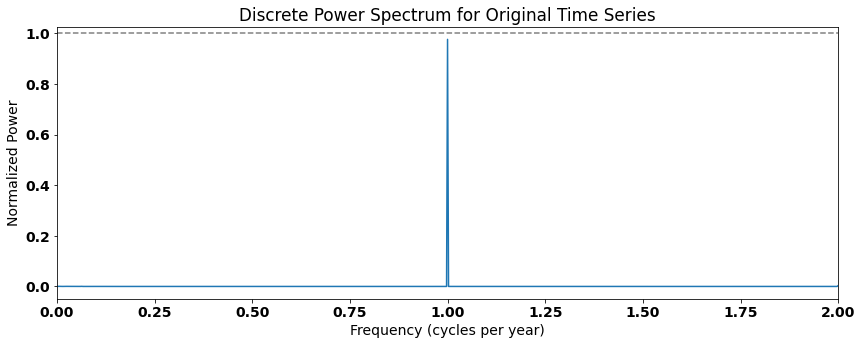

In [422]:
plt.figure(figsize=(14,5))
plt.plot(freq,ck2/np.sum(ck2))
plt.axhline(1,color='gray',linestyle="--")
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Normalized Power')
plt.xlim(0,2)
plt.title("Discrete Power Spectrum for Original Time Series")

### DFT of running-mean filtered time series:

In [423]:
# compute discrete FFT of running-mean filtered time series
sie_rm_fft = np.fft.fft(sie_rm-np.mean(sie_rm))
sie_rm_fft = sie_rm_fft/len(sie_rm)

# compute power
ck2_rm = 2*np.abs(sie_rm_fft[0:int(len(sie_rm)/2.0+1)])**2

Create new frequency dimension because the length of `sie_rm` is smaller than `sie_ts`.

In [424]:
# time dimension
t1 = np.arange(0,len(sie_rm)+1)

# frequency
freq1 = 365*np.arange(0,int(len(t1)/2.0)+1)/len(t1)

Plot the normalized power as a function of frequency in **cycles per year**.

Text(0.5, 1.0, 'Discrete Power Spectrum for Running-mean Filtered Time Series')

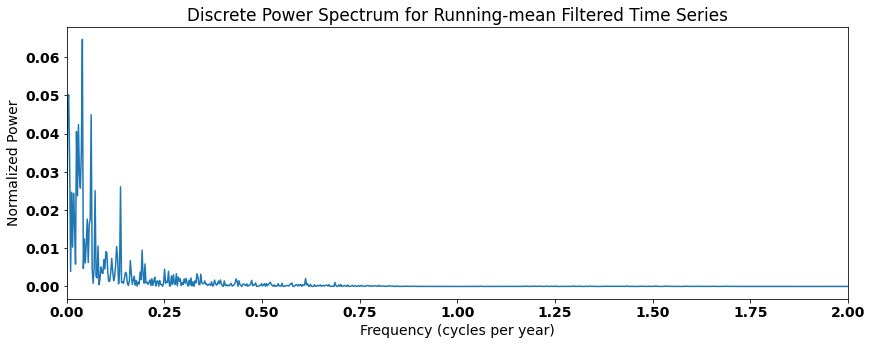

In [425]:
plt.figure(figsize=(14,5))
plt.plot(freq1,ck2_rm/np.sum(ck2_rm))
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Normalized Power')
plt.xlim(0,2)
plt.title("Discrete Power Spectrum for Running-mean Filtered Time Series")

### DFT of Gaussian filtered time series:

In [426]:
# compute discrete FFT of Gaussian filtered time series
sie_gaus_fft = np.fft.fft(sie_gaus-np.mean(sie_gaus))
sie_gaus_fft = sie_gaus_fft/len(sie_gaus)

# compute power
ck2_gaus = 2*np.abs(sie_gaus_fft[0:int(len(sie_gaus)/2.0+1)])**2

Create new frequency dimension because the length of `sie_gaus` is smaller than `sie_ts`.

In [427]:
# time dimension
t2 = np.arange(0,len(sie_gaus))

# frequency
freq2 = 365*np.arange(0,int(len(t2)/2.0)+1)/len(t2)

Plot the normalized power as a function of frequency in **cycles per year**.

Text(0.5, 1.0, 'Discrete Power Spectrum for Gaussian Filtered Time Series')

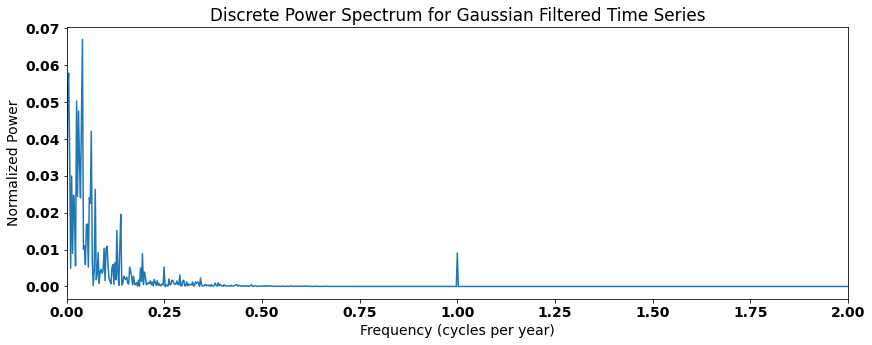

In [428]:
plt.figure(figsize=(14,5))
plt.plot(freq2,ck2_gaus/np.sum(ck2_gaus))
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Normalized Power')
plt.xlim(0,2)
plt.title("Discrete Power Spectrum for Gaussian Filtered Time Series")

Now, plot the power spectra of the two filtered time series together. Set `plt.xlim` to `(0,0.5)` to zoom in on the low frequencies.

Text(0.5, 1.0, 'Discrete Power Spectrum for Filtered Time Series')

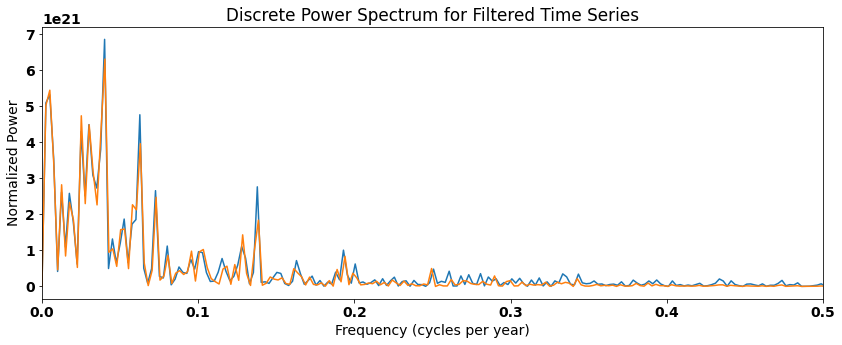

In [433]:
plt.figure(figsize=(14,5))
plt.plot(freq1,ck2_rm)
plt.plot(freq2,ck2_gaus)
plt.xlabel('Frequency (cycles per year)')
plt.ylabel('Normalized Power')
plt.xlim(0,0.5)
plt.title("Discrete Power Spectrum for Filtered Time Series")

**Reflection Question:**\
How do the two curves differ in the above plot? Do they differ in a way that is consistent with the nature of their response functions? 